# -- Simple Recommender system based on Cosine Similarity using NLP (Pytorch)-------------------

A simple Natural Language Understanding system that comprises obtaining the key information from the user on the sort of legal qualities or the type of case that they have, and then the system recommends possible lawyers that they may engage.

++ Note that this is a trial prototype with only one attribute (Cosine Similarity) taken into account.

# Importing Libraries to be used

In [19]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('averaged_perceptron_tagger')
from sentence_transformers import SentenceTransformer, util
import numpy as np
from nltk.tokenize import sent_tokenize
import requests
import re
from typing import List
import spacy
from spacy.tokens import Doc
from tqdm import tqdm
from bs4 import BeautifulSoup
import torch
from transformers import BertForQuestionAnswering
from transformers import BertTokenizer

import stanza
stanza.download('en')

import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to C:\Users\Aime
[nltk_data]     Munezero\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Aime Munezero\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


2022-04-01 01:09:51 INFO: Downloading default packages for language: en (English)...
2022-04-01 01:09:53 INFO: File exists: C:\Users\Aime Munezero\stanza_resources\en\default.zip.
2022-04-01 01:09:58 INFO: Finished downloading models and saved to C:\Users\Aime Munezero\stanza_resources.


# Loading Lawyer's data that I created

In [2]:
lawyer_data = pd.read_excel('lawyer_data.xlsx')

In [12]:
lawyer_data.shape

(5, 3)

# Cleaning data

In [11]:
#Creating another preprocessed cleaned column 

In [4]:
lawyer_data['Descriptions'] = lawyer_data['Description'].map(lambda x: re.sub(r'\W+', ' ', x.lower()))

In [5]:
lawyer_data

,Lawyers,Description,Descriptions
0,ERIC KNUSTROM,Eric's love of beer began early at his grandmo...,eric s love of beer began early at his grandmo...
1,Sarah R.,Sarah Fink is an associate at KaiserDilton PLL...,sarah fink is an associate at kaiserdilton pll...
2,Antonia M. Apps,Ms. Apps is a former federal prosecutor and na...,ms apps is a former federal prosecutor and nat...
3,Bob Dole,He is the perfect example of hard work and goo...,he is the perfect example of hard work and goo...
4,Elena Kagan,has an outstanding career path. Her interests ...,has an outstanding career path her interests i...


# Computing the similarity between the data entered by the user and the lawyers data

In [7]:
def checkSimilarities(description,article):

    paragraphRelevant=''
    model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
    sentences = sent_tokenize(article)
    
    sentences.insert(0,description)
    embeddings= model.encode(sentences, convert_to_tensor=True)
    cosine_scores = util.pytorch_cos_sim(embeddings[0], embeddings[1:])
    
    return cosine_scores

# User data

In [8]:
description = 'A specialist in data privacy and cybersecurity.'.lower()
d = re.sub('[!@#$.,;]', '', description)

# Calculating the cosine Similarity between user data entered and lawyer's bio, and then storing and sorting them in a dictionary

In [10]:
score = {}
new= []
list_scores = []
for j in lawyer_data['Descriptions']:
    list_scores.append(checkSimilarities(d,j))

for i in list_scores:
    x = re.findall(r'\[\[(.*?)\]\]',str(i))
    new.append(x)
new = [j for i in new for j in i]
for i,j in zip(lawyer_data['Lawyers'],new):
    score[i] = j

    #Sorting dictionary by value

score = {k: v for k, v in sorted(score.items(), key=lambda item: item[1])}
data = score

# Visualizing Lawyer's name with their approximative score

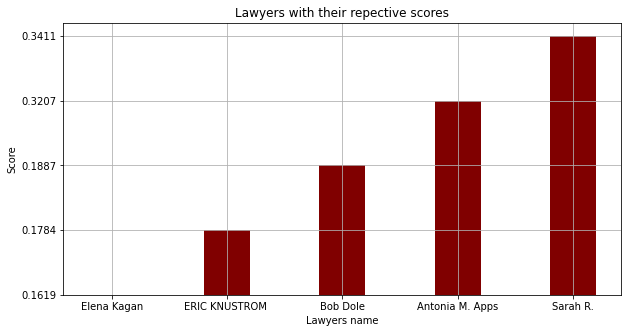

In [24]:
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Lawyers name")
plt.ylabel("Score")
plt.title("Lawyers with their repective scores")

plt.grid()
plt.show()

In [14]:
name, score = max(data.items(), key = lambda k : k[1])

In [18]:
print("Based on the data entered, the Best Lawyer to recommend is {}".format(name))

Based on the data entered, the Best Lawyer to recommend is Sarah R.
